In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 419 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import numpy as np
import pandas as pd
# import pyflux as pf
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [4]:
def GARCH(param, *args):
 "Initialize Params:"
 mu = param[0]
 omega = param[1]
 alpha = param[2]
 beta = param[3]
 T = Y.shape[0]
 GARCH_Dens = np.zeros(T) 
 sigma2 = np.zeros(T)       
 F = np.zeros(T)   
 v = np.zeros(T)   
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
    v[t] = sigma2[t]
    GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
                    (1/2)*(F[t]/v[t])     
    Likelihood = np.sum(GARCH_Dens[1:-1])  
    return Likelihood


In [5]:
def GARCH_PROD(params, Y0, T):
 mu = params[0]
 omega = params[1]
 alpha = params[2]
 beta = params[3]
 Y = np.zeros(T)  
 sigma2 = np.zeros(T)
 Y[0] = Y0
 sigma2[0] = 0.003
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
 return Y    

In [6]:
TSMC = yf.download('TSM', datetime(2022,4,1), datetime(2022,7,30))
# Y = TSLA['Adj Close'].values
Y = np.diff(np.log(TSMC['Adj Close'].values)
           )


[*********************100%***********************]  1 of 1 completed


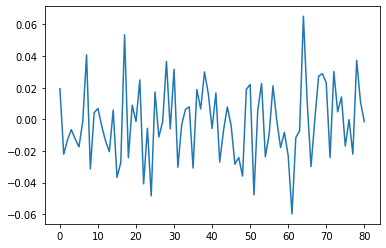

In [7]:
sns.lineplot(data=Y)

         Current function value: -11.270859
         Iterations: 0
         Function evaluations: 127
         Gradient evaluations: 23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: OptimizeWarning: Unknown solver options: xtol
  after removing the cwd from sys.path.


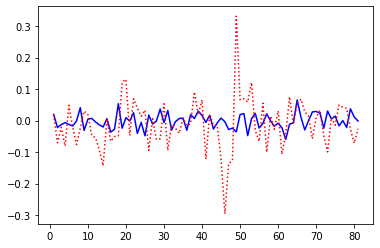

In [8]:
T = Y.shape[0]

param0 = np.array([0, 0.002, 0.3, 0.3])
param_star = minimize(GARCH, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH = GARCH_PROD(param_star.x, Y[0], T)
timevec = np.linspace(1,T,T)
plt.plot(timevec, Y,'b',timevec, Y_GARCH,'r:')